## Exploring trade-off between house price and age in Boston dataset
Generally, there is a trade-off between house price and age. But you may want to buy a ralatively new one as cheap as possible.

Then, what kind of building should we look for?

In this tutorial,

1. Train two machine learning models for house prices and age in boston dataset usign sklearn.

2. Find out pareto-optimum inputs of price and age using optga.

### 1. Training machine learining model
First, train predictive models for price and age.

Since building sophisticated predictive models is not the purpose of this tutorial, we will use a simple random forest regression model without hyperparameter tuning and cross-validation.

In [1]:
#: Load boston housing price datasets
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df =  pd.DataFrame(boston.data, columns=boston.feature_names)

X = df.drop(["AGE"], 1)
y_price = pd.DataFrame(boston.target, columns=["Price"])
y_age = pd.DataFrame(df["AGE"])


In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


**Note: Constraints should be added:**

CHAS: [0, 1]

ZN: [0, 100]

RAD: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24]


In [3]:
#: create predictive model
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

model_price = RandomForestRegressor().fit(X, y_price)
model_age = RandomForestRegressor().fit(X, y_age)

### 2. Optimize ML input to explore trade-off relationship of price and age

In [4]:
#: if not pip installed 
import sys
sys.path.append("..")

import optga
from optga.optimizer import Optimizer

optga.__version__

'0.1.5'

In [5]:
optimizer = Optimizer(sample_data=X)

optimizer.add_objective("Price", model_price.predict, direction="minimize")
optimizer.add_objective("Age", model_age.predict, direction="minimize")

optimizer.add_discrete_constraint("CHAS", [0, 1])
optimizer.add_discrete_constraint("ZN", [0, 100])
optimizer.add_discrete_constraint("RAD", list(range(1, 9)) + [24])

In [6]:
#: confirm optimization config
optimizer.show_config()

{
  "mate": "MateCxTwoPoints",
  "mutate": "MutateUniform",
  "select": "SelectNSGA2",
  "birth_rate": 2,
  "mutpb": 0.2,
  "indpb": 0.1,
  "objectives": {
    "Price": "minimize",
    "Age": "minimize"
  },
  "limits": {
    "CRIM": [
      0.00632,
      88.9762
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "INDUS": [
      0.46,
      27.74
    ],
    "CHAS": [
      0.0,
      1.0
    ],
    "NOX": [
      0.385,
      0.871
    ],
    "RM": [
      3.561,
      8.78
    ],
    "DIS": [
      1.1296,
      12.1265
    ],
    "RAD": [
      1.0,
      24.0
    ],
    "TAX": [
      187.0,
      711.0
    ],
    "PTRATIO": [
      12.6,
      22.0
    ],
    "B": [
      0.32,
      396.9
    ],
    "LSTAT": [
      1.73,
      37.97
    ]
  },
  "discrete_constraints": {
    "CHAS": [
      0.0,
      1.0
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "RAD": [
      1.0,
      2.0,
      3.0,
      4.0,
      5.0,
      6.0,
      7.0,
      8.0,
      24.0
    ]
  },
 

In [7]:
#: run optimization
optimizer.run(n_gen=300, population_size=300, logging_per=50)

(INFO)[2020-01-06 23:08:27,953]
====Generation 0 ====
(INFO)[2020-01-06 23:08:27,954]
          MAX     MIN    Average
Price  45.372   8.458  22.237163
Age    95.219  14.791  70.757477
(INFO)[2020-01-06 23:08:35,168]
====Generation 50 ====
(INFO)[2020-01-06 23:08:35,169]
          MAX     MIN    Average
Price  37.567   6.204  14.614170
Age    94.471  10.654  55.673632
(INFO)[2020-01-06 23:08:35,171]
Average time per generation: 0.14424023628234864
(INFO)[2020-01-06 23:08:41,965]
====Generation 100 ====
(INFO)[2020-01-06 23:08:41,965]
          MAX    MIN    Average
Price  45.496  5.891  16.882643
Age    91.563  9.764  44.605697
(INFO)[2020-01-06 23:08:41,975]
Average time per generation: 0.13586848735809326
(INFO)[2020-01-06 23:08:48,910]
====Generation 150 ====
(INFO)[2020-01-06 23:08:48,910]
          MAX    MIN    Average
Price  32.015  5.788  16.230009
Age    94.256  9.631  49.329008
(INFO)[2020-01-06 23:08:48,910]
Average time per generation: 0.13870314598083497
(INFO)[2020-01-06 

### 3.Visualize Result

In [8]:
optimizer.export_result("boston_result")

Overwrite: boston_result


In [9]:
Y_init = pd.read_csv("boston_result/Y_init.csv")
Y_pareto = pd.read_csv("boston_result/Y_pareto.csv")


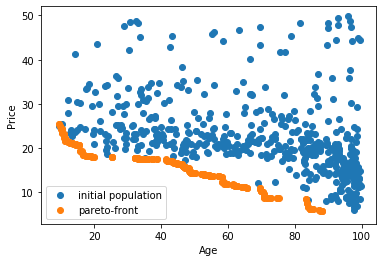

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_init["Age"], Y_init["Price"], label="initial population")
plt.scatter(Y_pareto["Age"], Y_pareto["Price"], label="pareto-front")
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend()